## Yorum ve anlam

Verilen bağımsız değişkenlerin anlanlı olduğunu anlayabilmek için p değerinin düşük olduğunu kontrol etmemiz gerekir.0,05 ten daha küçük bir p-value bizim değişkenimizin sonuçla doğrudan bir ilişkisi olduğu bilgisini verir.

## Hava durumu modeli¶

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
weather = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/weatherHistory.csv")
weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


**Hedef değişkeninizin görünür sıcaklık ve sıcaklık arasındaki fark olduğu doğrusal bir regresyon modeli oluşturun. Açıklayıcı değişkenler olarak nem ve rüzgar hızı kullanın. Şimdi, modelinizi OLS kullanarak tahmin edin. Tahmin edilen katsayılar istatistiksel olarak anlamlı mıdır? Tahmini katsayılar önceki beklentileriniz doğrultusunda mı? Tahmin edilen katsayıları yorumlayınız. Hedef ve açıklayıcı değişkenler arasındaki ilişkiler nelerdir?**

In [2]:
weather.insert(3, "Temperature Difference (C)",(weather["Temperature (C)"] - weather["Apparent Temperature (C)"]))

weather.drop(columns = ["Temperature (C)", "Apparent Temperature (C)", "Loud Cover"], inplace = True)

weather.head()

,Formatted Date,Summary,Precip Type,Temperature Difference (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,2.083333,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,2.127778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,0.000000,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,2.344444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,1.777778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


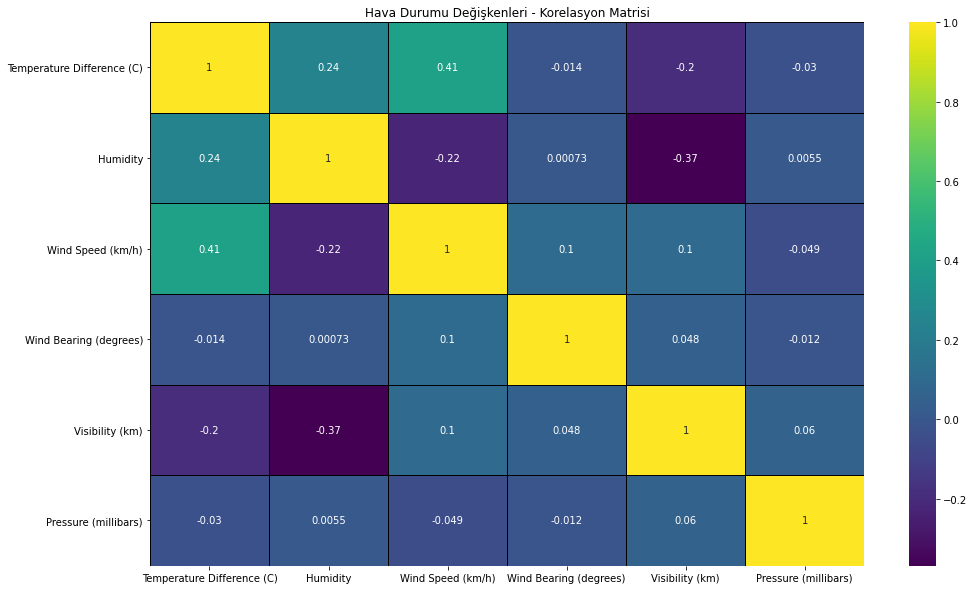

In [3]:
weather_corr = weather.corr()
plt.figure(figsize=(16,10))
ax = sns.heatmap(weather_corr, annot = True, linewidths = 1, linecolor = "black",cmap = "viridis", mask = None)
plt.title("Hava Durumu Değişkenleri - Korelasyon Matrisi")
plt.show()

**Ardından, yukarıdaki modele nem ve rüzgar hızı etkileşimini dahil edin ve OLS'yi kullanarak modeli tahmin edin. Katsayılar istatistiksel olarak anlamlı mıdır? Nem ve rüzgar hızı için tahmini katsayıların işaretleri değişti mi? Tahmin edilen katsayıları yorumlayınız.**

In [4]:
y1 = weather["Temperature Difference (C)"]
x1 = weather[["Humidity", "Wind Speed (km/h)"]]

x1 = sm.add_constant(x1)
results1_model = sm.OLS(y1, x1)
results1 = results1_model.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Temperature Difference (C)   R-squared:                       0.288
Model:                                    OLS   Adj. R-squared:                  0.288
Method:                         Least Squares   F-statistic:                 1.949e+04
Date:                        Thu, 29 Apr 2021   Prob (F-statistic):               0.00
Time:                                00:44:14   Log-Likelihood:            -1.7046e+05
No. Observations:                       96453   AIC:                         3.409e+05
Df Residuals:                           96450   BIC:                         3.409e+05
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.4381      0.021   -115.948      0.000      -2.479      -2.397
Humidity              3.0292      0.024    126.479      0.000       2.982       3.076
Wind Speed (km/h)     0.1193      0.001    176.164      0.000       0.118       0.121
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                           0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
# nem ve rüzgar hızı etkileşimi
weather["Humidity x Wind Speed"] = weather.Humidity * weather["Wind Speed (km/h)"]

y1 = weather["Temperature Difference (C)"]
x1_new = weather[["Humidity", "Wind Speed (km/h)", "Humidity x Wind Speed"]]

x1_new = sm.add_constant(x1_new)
results1_model = sm.OLS(y1, x1_new)
results1 = results1_model.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Temperature Difference (C)   R-squared:                       0.341
Model:                                    OLS   Adj. R-squared:                  0.341
Method:                         Least Squares   F-statistic:                 1.666e+04
Date:                        Thu, 29 Apr 2021   Prob (F-statistic):               0.00
Time:                                00:44:14   Log-Likelihood:            -1.6669e+05
No. Observations:                       96453   AIC:                         3.334e+05
Df Residuals:                           96449   BIC:                         3.334e+05
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0839      0.033     -2.511      0.012      -0.149      -0.018
Humidity                 -0.1775      0.043     -4.133      0.000      -0.262      -0.093
Wind Speed (km/h)        -0.0905      0.002    -36.797      0.000      -0.095      -0.086
Humidity x Wind Speed     0.2971      0.003     88.470      0.000       0.291       0.304
==============================================================================
Omnibus:                     4849.937   Durbin-Watson:                   0.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9295.404
Skew:                           0.378   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                         193.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Yorumlar:

İlk senaryoda, tahmin edilen katsayılar, istatistiksel olarak anlamlıdır. p değerleri çok düşüktür.

Bir önceki soruda bulunan Nem ve Rüzgar Hızı katsayıları sırasıyla -32.50 ve -0.20 iken şimdi, 3.03 ve 0.12 olarak bulunmuştur ki bu değerler bir öncekine göre oldukça farklıdır. Bir önceki soruda, sıcaklık üzerindeki en büyük etkiyi Nem değişkeni yaparken, şimdiki değer 10 kat düşmüştür.

Yeni oluşturduğumuz "Nem x Rüzgar Hızı" değişkenini eklediğimiz zaman Nem ve Rüzgar Hızı katsayılarının işaretleri değişmiş, sabit değer düşmüştür. Katsayılar, istatistiksel olarak anlamlıdır fakat sabit değerin p-değeri, 0.012'ye yükselmiştir.

## Ev fiyatları modeli

In [6]:
house = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
y2 = house["SalePrice"]
x2 = house[["OverallQual","YearBuilt","TotalBsmtSF","GrLivArea","MSSubClass","FullBath","GarageCars","GarageArea", "TotRmsAbvGrd","YrSold"]]

In [8]:
x2 = sm.add_constant(x2)
results2_model = sm.OLS(y2, x2)
results2 = results2_model.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     501.3
Date:                Thu, 29 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:44:15   Log-Likelihood:                -17453.
No. Observations:                1460   AIC:                         3.493e+04
Df Residuals:                    1449   BIC:                         3.499e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.434e+05    1.5e+06     -0.563      0.574   -3.78e+06     2.1e+06
OverallQual   2.097e+04   1145.005     18.317      0.000    1.87e+04    2.32e+04
YearBuilt      355.7028     47.290      7.522      0.000     262.939     448.467
TotalBsmtSF     22.0935      3.023      7.308      0.000      16.163      28.024
GrLivArea       57.9927      4.178     13.879      0.000      49.796      66.189
MSSubClass    -166.4409     25.262     -6.589      0.000    -215.994    -116.887
FullBath     -3546.3345   2660.490     -1.333      0.183   -8765.159    1672.490
GarageCars    1.123e+04   3031.759      3.704      0.000    5283.628    1.72e+04
GarageArea      10.4148     10.283      1.013      0.311      -9.756      30.585
TotRmsAbvGrd  -843.9739   1119.717     -0.754      0.451   -3040.414    1352.466
YrSold          39.7272    745.204      0.053      0.957   -1422.067    1501.521
==============================================================================
Omnibus:                      443.172   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49433.605
Skew:                          -0.267   Prob(JB):                         0.00
Kurtosis:                      31.501   Cond. No.                     5.19e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.19e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
# TotRmsAbvGrd değişkeni çıkarıldı.
x3 = house[["OverallQual","YearBuilt","TotalBsmtSF","GrLivArea","GarageCars"]]
x3 = sm.add_constant(x3)
results2_model = sm.OLS(y2, x3)
results2 = results2_model.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     962.4
Date:                Thu, 29 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:44:15   Log-Likelihood:                -17478.
No. Observations:                1460   AIC:                         3.497e+04
Df Residuals:                    1454   BIC:                         3.500e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -6.72e+05   8.49e+04     -7.920      0.000   -8.38e+05   -5.06e+05
OverallQual  2.039e+04   1156.435     17.633      0.000    1.81e+04    2.27e+04
YearBuilt     301.4334     44.591      6.760      0.000     213.964     388.902
TotalBsmtSF    29.9779      2.821     10.628      0.000      24.445      35.511
GrLivArea      50.8315      2.564     19.825      0.000      45.802      55.861
GarageCars   1.451e+04   1823.547      7.957      0.000    1.09e+04    1.81e+04
==============================================================================
Omnibus:                      437.776   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45052.102
Skew:                          -0.280   Prob(JB):                         0.00
Kurtosis:                      30.208   Cond. No.                     2.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Yorumlar:

    p-değeri çok yüksek olduğundan, evin satılma yılı değişkeni olan "YrSold,TotRmsAbvGrd,GarageArea" ve sabit (const) değeri istatistiksel olarak anlamsızdır.
    
    Değişken çıkarıldıktan sonra diğer katsayılar küçük oranda, sabit yani bias terimi ise büyük oranda değişmiştir. Ayrıca sabit terim artık istatistiksel olarak da anlamlıdır.
    
    "Katsayıları incelediğimiz zaman, en yüksek etkinin "OverallQual" (Genel materyal ve yüzey kalitesi) değişkeninden geldiğini görürüz. En düşük etki ise ""TotalBsmtSF"" değişkenindedir."
    soruda yazıldığı gibi, direkt olarak katsayılara bakarak "etkiyi" belirlemek doğru değildir çünkü bağımsız değişken büyük, katsayı küçük olursa, etki yine büyük olabilir.
    
    "Kişisel olarak, genel kalite, garaj alanı ve oda sayısı gibi değişkenleri fiyat üzerinde anlamlı bulsam da yapım yılı değerinin etkisini ve bahçe alanı değişkeninin küçük katsayısı beklediğimden düşük çıktı.
    
    Bahçe alanı geniş olduğundan, bağımsız değişkenin değerleri büyüktür ($ornek: 1200 feet^2$). Katsayısının küçük olması, etkinin de küçük olduğu anlamına gelmez.